In [3]:
# See https://keras.io/applications for details
from tensorflow.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
# from tensorflow.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input
model = DenseNet121()

In [10]:
#model.summary()

In [5]:
# First Layer Varibles
[w for w in model.weights if w.name.startswith('conv1')]

[<tf.Variable 'conv1/conv_1/kernel:0' shape=(7, 7, 3, 64) dtype=float32>,
 <tf.Variable 'conv1/bn_1/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/moving_mean:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/moving_variance:0' shape=(64,) dtype=float32>]

In [6]:
import tensorflow as tf
s = tf.keras.backend.get_session()

In [7]:
kw = s.run(model.weights[0])

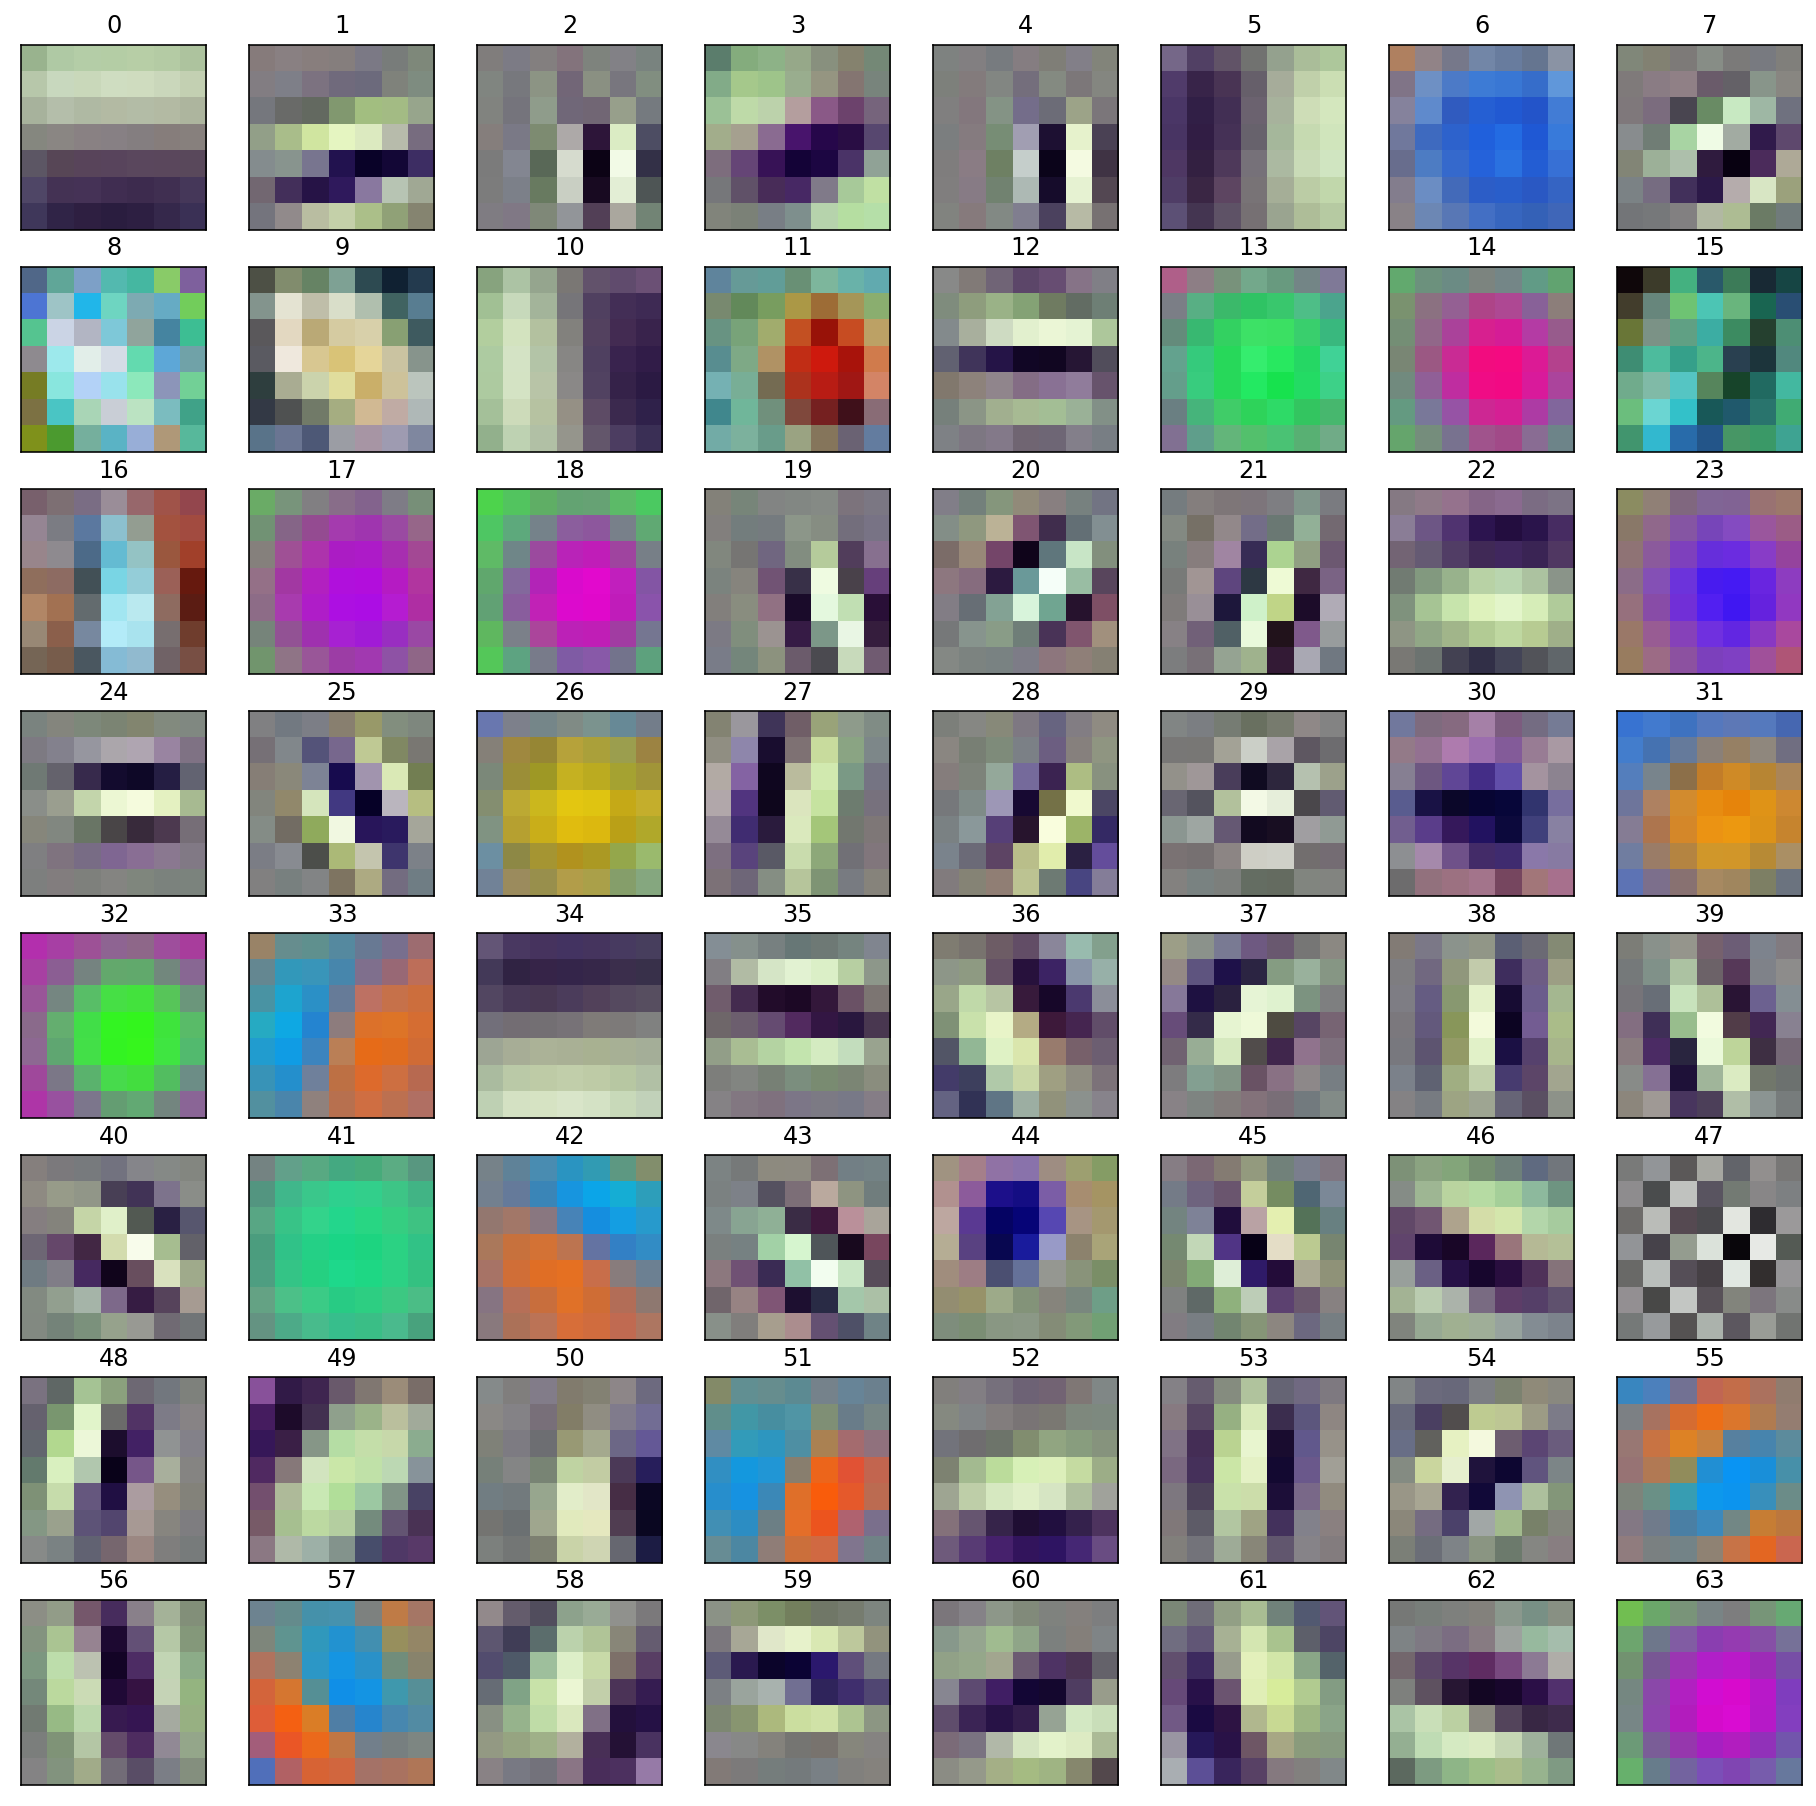

In [9]:
%config InlineBackend.figure_format = 'retina'
from utils import plot_conv_kernel
plot_conv_kernel(kw)

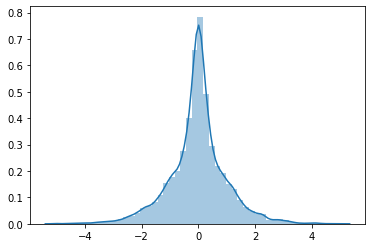

In [28]:
import seaborn as sns
sns.distplot(kw.ravel())